In [5]:
# Importing libraries
# import plaidml.keras
# plaidml.keras.install_backend()

import tensorflow as tf

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
# Checking shape of training set
train_images.shape

(60000, 28, 28)

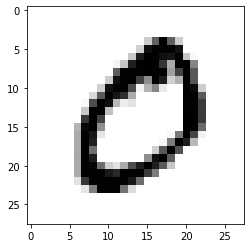

In [4]:
# Visualizing data
plt.imshow(train_images[1], cmap = plt.cm.binary)

In [5]:
# Importing libraries to create layers of NN
from keras import models, layers

In [6]:
# Neural Network
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape = (28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

INFO:plaidml:Opening device "opencl_amd_iceland.0"


In [7]:
network.compile(optimizer='rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [8]:
# Reshaping data according to the network expectations
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

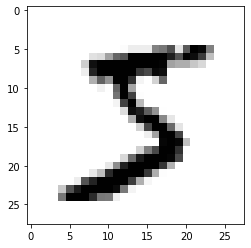

In [9]:
plt.imshow(train_images[0].reshape((28, 28)), cmap = plt.cm.binary)

In [10]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [11]:
# Fitting training data
network.fit(train_images, train_labels, epochs = 5, batch_size = 128)

Epoch 1/5
60000/60000 [==============================] - 27s 451us/step - loss: 0.2575 - acc: 0.9258
Epoch 2/5
60000/60000 [==============================] - 19s 313us/step - loss: 0.1041 - acc: 0.9690
Epoch 3/5
60000/60000 [==============================] - 21s 354us/step - loss: 0.0688 - acc: 0.9788
Epoch 4/5
60000/60000 [==============================] - 20s 334us/step - loss: 0.0497 - acc: 0.9846
Epoch 5/5
60000/60000 [==============================] - 19s 323us/step - loss: 0.0380 - acc: 0.9883


In [12]:
# Evaluating model on testing data
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 9s 926us/step


In [13]:
# Accuracy of our model
test_acc

0.973